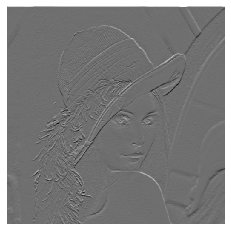

In [16]:
import numpy as np
from scipy import fftpack as fp
import matplotlib.pyplot as plt
from skimage import io, color, util
from helper import *
f = io.imread('lena.bmp')
f = color.rgb2gray(f);
h = np.array([[1,2,1], [0,0,0],
[-1,-2,-1]]) # sobel operator
w,l = paddedsize(f.shape[0],
f.shape[1])
f2 = fp.fft2(f,(w,l))
h2 = fp.fft2(h,(w,l))
F_fh = h2*f2
res = fp.ifft2(F_fh).real
res = res[:f.shape[0],:f.shape[1]]
plt.imshow(res, cmap='gray')
plt.axis("off"); plt.show()

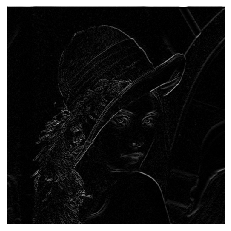

In [17]:
ffi = abs(res)
plt.imshow(ffi, cmap='gray')
plt.axis("off"); plt.show()

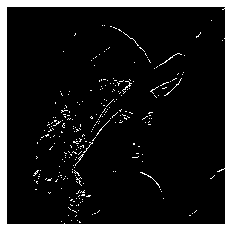

In [18]:
bin = ffi > 0.2*max(ffi.flatten())
plt.imshow(bin, cmap='gray')
plt.axis("off"); plt.show()

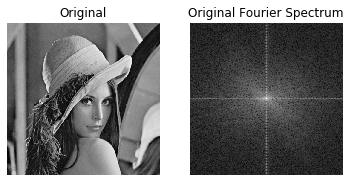

In [20]:
i1 = color.rgb2gray(io.imread('lena.bmp'))
w, l = paddedsize(i1.shape[0], i1.shape[1])
# membuat gaussian lowpass filter
# fungsi lpfilter terdapat di file helper.py
h = lpfilter('gaussian', w, l, 0.05 * w)
# menghitung DFT citra
f = fp.fft2(i1,(w,l))
# Apply lowpass filter
LPFS_lena = h*f
# convert ke domain spasial
LPF_lena = fp.ifft2(LPFS_lena).real
LPF_lena = LPF_lena[:i1.shape[0],:i1.shape[1]]

# Menampilkan fourier spectrum
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_lena)
# fungsi abs untuk menghitung magnitude
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf))
plt.subplot(1,2,1); plt.imshow(i1, cmap='gray')
plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray')
plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.show()